# Modeling and Evaluation

In [1]:
# imports
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
from pandas import read_csv

watch_df = read_csv("../data/watch_df.csv")

In [3]:
watch_df

,title,text,subreddit
0,Garmin dc40 troubles,"Hi, i have 2 garmin dc40 collars that have a b...",garmin
1,Checking to verify this combination will fit m...,"Hi all,I was pointed to Garmin devices by anot...",garmin
2,Garmin fenix 3,We need to do something this latest update 5.1...,garmin
3,Fenix 3 user manual,Anyone know where to find the user manual for ...,garmin
4,Fenix 3 Mistake,"I love my Fenix 3, but forgot to charge it las...",garmin
...,...,...,...
3558,The difference an adapter makes!!!,Switched to a pin adapter from the other adapt...,applewatch
3559,What is your favorite feature about Apple Watch?,I'm looking for apps to use with mine and want...,applewatch
3560,Anyone want a 42mm SGS+WSB+ML?,I could sell the watch and black band for 350....,applewatch
3561,How to find friends with Apple Watches?,Is there any way to scan your contacts and dis...,applewatch


In [4]:
# concatnate title + text into title_text
watch_df['title_text'] = watch_df['title'] + ' ' + watch_df['text']
watch_df.head()

,title,text,subreddit,title_text
0,Garmin dc40 troubles,"Hi, i have 2 garmin dc40 collars that have a b...",garmin,"Garmin dc40 troubles Hi, i have 2 garmin dc40 ..."
1,Checking to verify this combination will fit m...,"Hi all,I was pointed to Garmin devices by anot...",garmin,Checking to verify this combination will fit m...
2,Garmin fenix 3,We need to do something this latest update 5.1...,garmin,Garmin fenix 3 We need to do something this la...
3,Fenix 3 user manual,Anyone know where to find the user manual for ...,garmin,Fenix 3 user manual Anyone know where to find ...
4,Fenix 3 Mistake,"I love my Fenix 3, but forgot to charge it las...",garmin,"Fenix 3 Mistake I love my Fenix 3, but forgot ..."


In [5]:
# drop "title" and "text" columns
watch_df.drop(columns=['title', 'text'], inplace=True)
watch_df.head()

,subreddit,title_text
0,garmin,"Garmin dc40 troubles Hi, i have 2 garmin dc40 ..."
1,garmin,Checking to verify this combination will fit m...
2,garmin,Garmin fenix 3 We need to do something this la...
3,garmin,Fenix 3 user manual Anyone know where to find ...
4,garmin,"Fenix 3 Mistake I love my Fenix 3, but forgot ..."


## Modeling

In [6]:
X = watch_df[['title_text']]
y = watch_df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [7]:
def vectorize_text(X_train, X_test, vectorizer):
    # remove "garmin" and "apple" from X
    X_train = X_train.str.replace('garmin', '').str.replace('apple', '')
    X_test = X_test.str.replace('garmin','').str.replace('apple', '')

    # fit and transform X
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    # convert X to a DataFrame
    X_train = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
    X_test = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())
    return (X_train, X_test)

In [8]:
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model, params):
    gs = GridSearchCV(model, params, cv=5)
    gs.fit(X_train, y_train)
    print(f"Best params: {gs.best_params_}")
    print(f"Best score: {gs.best_score_}")
    print(f"Train score: {gs.score(X_train, y_train)}")
    print(f"Test score: {gs.score(X_test, y_test)}")
    return gs

In [25]:
# Remove "garmin" and "apple" from X_train and X_test dataframes
X_train["title_text"] = X_train["title_text"].str.replace('garmin', '', regex=True, flags=re.I).str.replace('apple', '', regex=True, flags=re.I)
X_test["title_text"] = X_test["title_text"].str.replace('garmin', '', regex=True, flags=re.I).str.replace('apple', '', regex=True, flags=re.I)

In [28]:
# Check "garmin" and "apple" are removed from X_train and X_test
X_train["title_text"].str.contains('garmin', regex=True, flags=re.I).sum()
X_train["title_text"].str.contains('apple', regex=True, flags=re.I).sum()
X_test["title_text"].str.contains('garmin', regex=True, flags=re.I).sum()
X_test["title_text"].str.contains('apple', regex=True, flags=re.I).sum()

0

In [33]:
# Remove "00garmin", "bandapple", and any stick alphabet with name are removed from X_train and X_test
X_train["title_text"] = X_train["title_text"].str.replace('00garmin', '', regex=True, flags=re.I).str.replace('bandapple', '', regex=True, flags=re.I).str.replace('applewatch', '', regex=True, flags=re.I).str.replace('garminwatch', '', regex=True, flags=re.I).str.replace('watch', '', regex=True, flags=re.I)
X_test["title_text"] = X_test["title_text"].str.replace('00garmin', '', regex=True, flags=re.I).str.replace('bandapple', '', regex=True, flags=re.I).str.replace('applewatch', '', regex=True, flags=re.I).str.replace('garminwatch', '', regex=True, flags=re.I).str.replace('watch', '', regex=True, flags=re.I)

In [34]:
# Check "garmin"  and "apple" unique words are removed from X_train and X_test
X_train["title_text"].str.contains('00garmin', regex=True, flags=re.I).sum()
X_train["title_text"].str.contains('bandapple', regex=True, flags=re.I).sum()
X_train["title_text"].str.contains('applewatch', regex=True, flags=re.I).sum()
X_train["title_text"].str.contains('garminwatch', regex=True, flags=re.I).sum()
X_train["title_text"].str.contains('watch', regex=True, flags=re.I).sum()

X_test["title_text"].str.contains('00garmin', regex=True, flags=re.I).sum()
X_test["title_text"].str.contains('bandapple', regex=True, flags=re.I).sum()
X_test["title_text"].str.contains('applewatch', regex=True, flags=re.I).sum()
X_test["title_text"].str.contains('garminwatch', regex=True, flags=re.I).sum()
X_test["title_text"].str.contains('watch', regex=True, flags=re.I).sum()

0

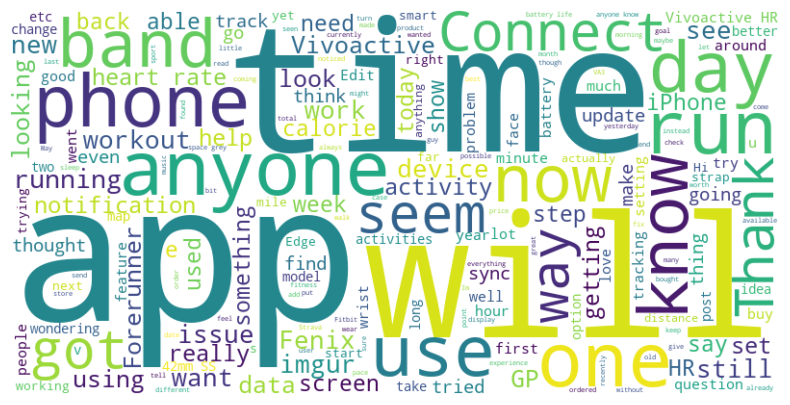

In [49]:
# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine 'text' and 'title' columns for wordcloud generation
text_combined = ' '.join(X_test['title_text'].tolist())

# Generate the wordcloud
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white').generate(text_combined)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Naive Bayes Models

In [39]:
cvec = CountVectorizer(stop_words='english')
X_train_cvec, X_test_cvec = vectorize_text(X_train["title_text"], X_test["title_text"], cvec)
nb = MultinomialNB()
nb_params = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}
nb_gs = train_and_evaluate_model(X_train_cvec, X_test_cvec, y_train, y_test, nb, nb_params)

Best params: {'alpha': 0.1, 'fit_prior': False}
Best score: 0.9318954111099444
Train score: 0.9831586826347305
Test score: 0.9304152637485971


In [40]:
tvec = TfidfVectorizer(stop_words='english')
X_train_tvec, X_test_tvec = vectorize_text(X_train['title_text'], X_test['title_text'], tvec)
nb = MultinomialNB()
nb_params = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False],
    'class_prior': [None, [.1, .9], [.2, .8], [.3, .7], [.4, .6], [.5, .5], [.6, .4], [.7, .3], [.8, .2], [.9, .1]]
}
nb_gs = train_and_evaluate_model(X_train_tvec, X_test_tvec, y_train, y_test, nb, nb_params)

Best params: {'alpha': 0.1, 'class_prior': [0.6, 0.4], 'fit_prior': True}
Best score: 0.921412020021702
Train score: 0.9850299401197605
Test score: 0.9337822671156004


### Random Forest

In [42]:
# Fit model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 1, 2, 3]
}
rf_gs = train_and_evaluate_model(X_train_cvec, X_test_cvec, y_train, y_test, rf, rf_params)

Best params: {'max_depth': None, 'n_estimators': 100}
Best score: 0.9199159928593931
Train score: 1.0
Test score: 0.9057239057239057


In [43]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 1, 2, 3]
}
rf_gs = train_and_evaluate_model(X_train_tvec, X_test_tvec, y_train, y_test, rf, rf_params)

Best params: {'max_depth': None, 'n_estimators': 200}
Best score: 0.9199166929188982
Train score: 1.0
Test score: 0.9180695847362514


### Logistic Regression

In [45]:
# Apply LogisticRegression with CVEC
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_params = {
    'C': [0.1, 0.5, 1.0]
}
lr_gs = train_and_evaluate_model(X_train_cvec, X_test_cvec, y_train, y_test, lr, lr_params)

Best params: {'C': 1.0}
Best score: 0.9318968112289545
Train score: 1.0
Test score: 0.9472502805836139


In [46]:
# Apply LogisticRegression with TVEC
lr = LogisticRegression()
lr_params = {
    'C': [0.1, 0.5, 1.0]
}
lr_gs = train_and_evaluate_model(X_train_tvec, X_test_tvec, y_train, y_test, lr, lr_params)

Best params: {'C': 1.0}
Best score: 0.9232867793762469
Train score: 0.9764221556886228
Test score: 0.9315375982042648


### BaggingClassifier

In [50]:
# Apply BaggingClassifier with CVEC
from ensurepip import bootstrap
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
bag_params = {'bootstrap': [True, False],
            'n_estimators': [100, 200],
            'max_features': [1, 2, 3]
}
bag_gs = train_and_evaluate_model(X_train_cvec, X_test_cvec, y_train, y_test, bag, bag_params)

Best params: {'bootstrap': True, 'max_features': 1, 'n_estimators': 100}
Best score: 0.6399705975007877
Train score: 0.6399700598802395
Test score: 0.6588103254769921


In [51]:
# Apply BaggingClassifier with TVEC
bag = BaggingClassifier()
bag_params = {'bootstrap': [True, False],
            'n_estimators': [100, 200],
            'max_features': [1, 2, 3]
}

bag_gs = train_and_evaluate_model(X_train_tvec, X_test_tvec, y_train, y_test, bag, bag_params)

Best params: {'bootstrap': True, 'max_features': 1, 'n_estimators': 100}
Best score: 0.6399705975007877
Train score: 0.6399700598802395
Test score: 0.6588103254769921


### AdaBoost Classifier

In [52]:
# Apply AdaBoostClassifier with CVEC
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.9, 1.0]
}
ada_gs = train_and_evaluate_model(X_train_cvec, X_test_cvec, y_train, y_test, ada, ada_params)

Best params: {'learning_rate': 0.9, 'n_estimators': 100}
Best score: 0.9139325842696631
Train score: 0.9666916167664671
Test score: 0.9169472502805837


In [53]:
# Apply AdaBoostClassifier with TVEC
ada = AdaBoostClassifier()
ada_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.9, 1.0]
}
ada_gs = train_and_evaluate_model(X_train_tvec, X_test_tvec, y_train, y_test, ada, ada_params)

Best params: {'learning_rate': 1.0, 'n_estimators': 100}
Best score: 0.9075592425356156
Train score: 0.969685628742515
Test score: 0.9135802469135802


### SVC

In [54]:
# Apply SVC with CVEC
from sklearn.svm import SVC
svc = SVC()
svc_params = {
    'C': [0.1, 0.5, 1.0],
}
svc_gs = train_and_evaluate_model(X_train_cvec, X_test_cvec, y_train, y_test, svc, svc_params)


Best params: {'C': 1.0}
Best score: 0.9113101613637159
Train score: 0.9861526946107785
Test score: 0.9124579124579124


In [55]:
# Apply SVC with TVEC
svc = SVC()
svc_params = {
    'C': [0.1, 0.5, 1.0]
}
svc_gs = train_and_evaluate_model(X_train_tvec, X_test_tvec, y_train, y_test, svc, svc_params)

Best params: {'C': 1.0}
Best score: 0.9315201792152333
Train score: 0.999251497005988
Test score: 0.9461279461279462


## Model Evaluation

Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes with TVEC')

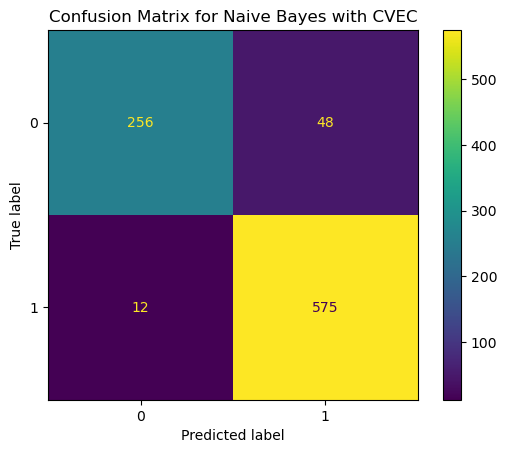

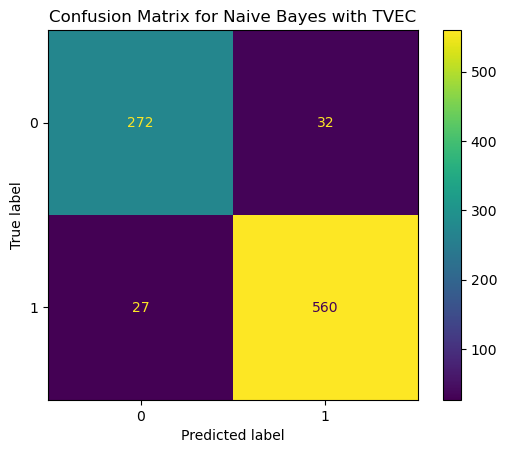

In [56]:
# Confusion Matrix
# Naive Bayes with CVEC
cm = confusion_matrix(y_test, nb_gs.predict(X_test_cvec))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Naive Bayes with CVEC')

# Naive Bayes with TVEC 
cm = confusion_matrix(y_test, nb_gs.predict(X_test_tvec))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Naive Bayes with TVEC')

Text(0.5, 1.0, 'Confusion Matrix for Random Forest with TVEC')

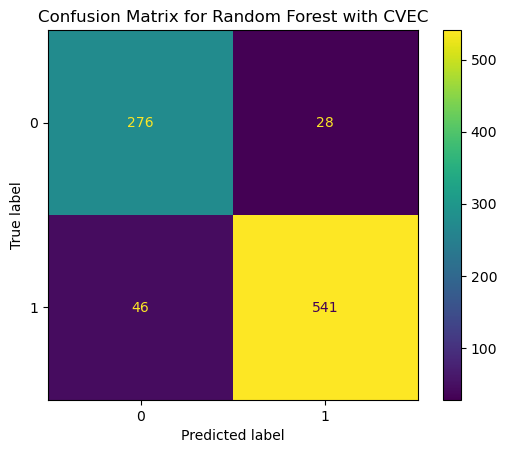

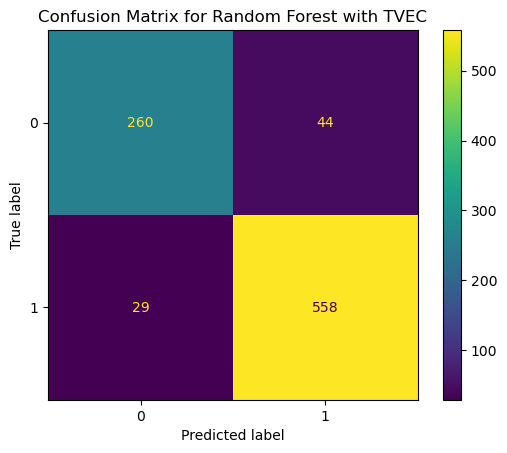

In [57]:
# Confusion Matrix for Random Forest with CVEC
cm = confusion_matrix(y_test, rf_gs.predict(X_test_cvec))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Random Forest with CVEC')

# Confusion Matrix for Random Forest with TVEC
cm = confusion_matrix(y_test, rf_gs.predict(X_test_tvec))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Random Forest with TVEC')

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression with TVEC')

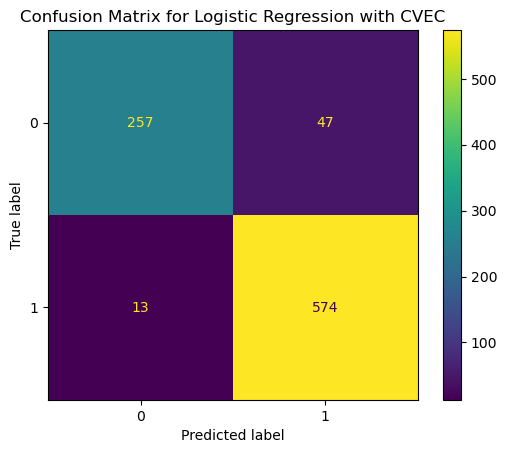

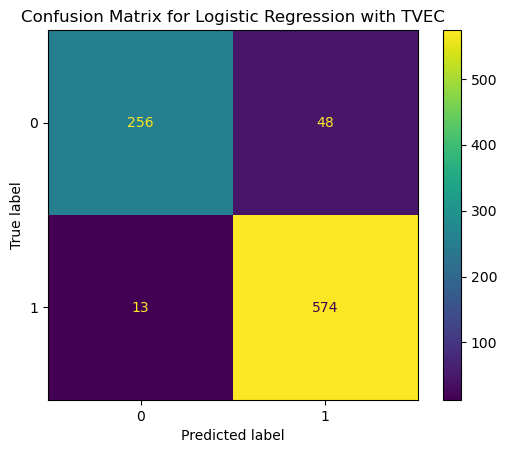

In [58]:
# Confusion Matrix for Logistic Regression with CVEC
cm = confusion_matrix(y_test, lr_gs.predict(X_test_cvec))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Logistic Regression with CVEC')

# Confusion Matrix for Logistic Regression with TVEC
cm = confusion_matrix(y_test, lr_gs.predict(X_test_tvec))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Logistic Regression with TVEC')

Text(0.5, 1.0, 'Confusion Matrix for Bagging Classifier with TVEC')

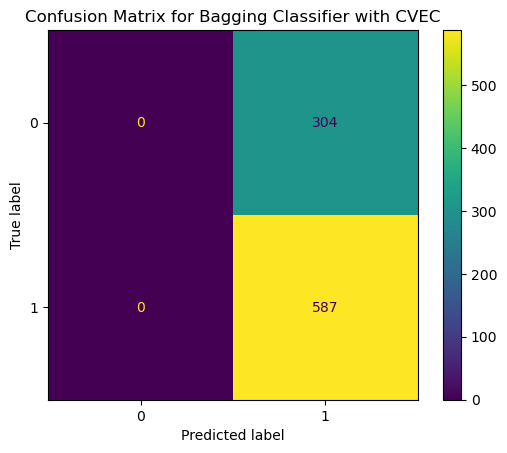

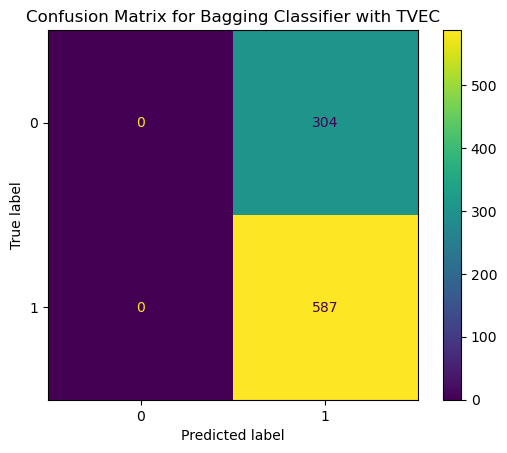

In [59]:
# Confusion Matrix for Bagging Classifier with CVEC
cm = confusion_matrix(y_test, bag_gs.predict(X_test_cvec))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Bagging Classifier with CVEC')

# Confusion Matrix for Bagging Classifier with TVEC
cm = confusion_matrix(y_test, bag_gs.predict(X_test_tvec))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Bagging Classifier with TVEC')

Text(0.5, 1.0, 'Confusion Matrix for AdaBoost Classifier with TVEC')

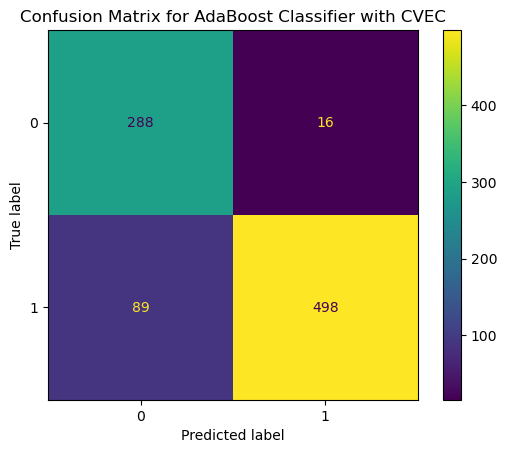

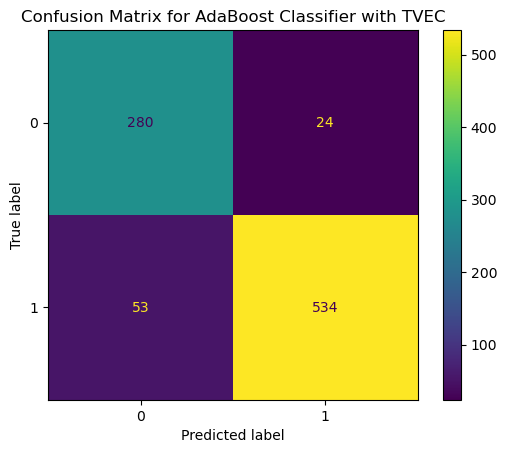

In [60]:
# Confusion Matrix for AdaBoost Classifier with CVEC
cm = confusion_matrix(y_test, ada_gs.predict(X_test_cvec))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for AdaBoost Classifier with CVEC')

# Confusion Matrix for AdaBoost Classifier with TVEC
cm = confusion_matrix(y_test, ada_gs.predict(X_test_tvec))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for AdaBoost Classifier with TVEC')

Text(0.5, 1.0, 'Confusion Matrix for SVC with TVEC')

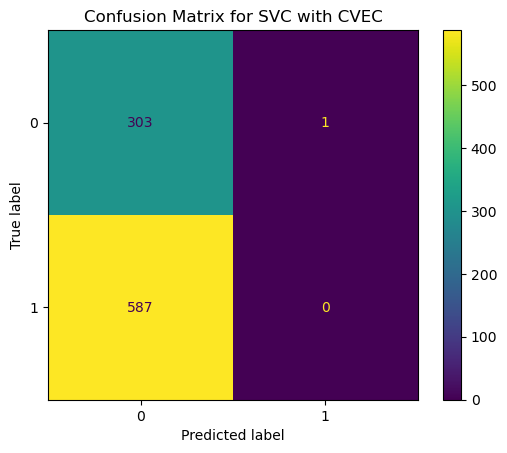

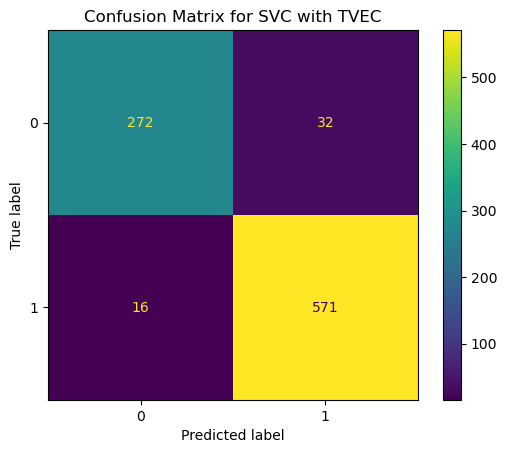

In [61]:
# Confusion Matrix for SVC with CVEC
cm = confusion_matrix(y_test, svc_gs.predict(X_test_cvec))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for SVC with CVEC')

# Confusion Matrix for SVC with TVEC
cm = confusion_matrix(y_test, svc_gs.predict(X_test_tvec))
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for SVC with TVEC')

In [62]:
# Classification Report all models with CVEC and TVEC
from sklearn.metrics import classification_report
print('Classification Report for Naive Bayes with CVEC')
print(classification_report(y_test, nb_gs.predict(X_test_cvec)))
print('Classification Report for Naive Bayes with TVEC')
print(classification_report(y_test, nb_gs.predict(X_test_tvec)))
print('Classification Report for Random Forest with CVEC')
print(classification_report(y_test, rf_gs.predict(X_test_cvec)))
print('Classification Report for Random Forest with TVEC')
print(classification_report(y_test, rf_gs.predict(X_test_tvec)))
print('Classification Report for Logistic Regression with CVEC')
print(classification_report(y_test, lr_gs.predict(X_test_cvec)))
print('Classification Report for Logistic Regression with TVEC')
print(classification_report(y_test, lr_gs.predict(X_test_tvec)))
print('Classification Report for AdaBoost Classifier with CVEC')
print(classification_report(y_test, ada_gs.predict(X_test_cvec)))
print('Classification Report for AdaBoost Classifier with TVEC')
print(classification_report(y_test, ada_gs.predict(X_test_tvec)))
print('Classification Report for SVC with CVEC')
print(classification_report(y_test, svc_gs.predict(X_test_cvec)))
print('Classification Report for SVC with TVEC')
print(classification_report(y_test, svc_gs.predict(X_test_tvec)))

Classification Report for Naive Bayes with CVEC
              precision    recall  f1-score   support

  applewatch       0.96      0.84      0.90       304
      garmin       0.92      0.98      0.95       587

    accuracy                           0.93       891
   macro avg       0.94      0.91      0.92       891
weighted avg       0.93      0.93      0.93       891

Classification Report for Naive Bayes with TVEC
              precision    recall  f1-score   support

  applewatch       0.91      0.89      0.90       304
      garmin       0.95      0.95      0.95       587

    accuracy                           0.93       891
   macro avg       0.93      0.92      0.93       891
weighted avg       0.93      0.93      0.93       891

Classification Report for Random Forest with CVEC
              precision    recall  f1-score   support

  applewatch       0.86      0.91      0.88       304
      garmin       0.95      0.92      0.94       587

    accuracy                        

In [63]:
# create a dataframe to compare all models
models = ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Bagging Classifier', 'AdaBoost Classifier', 'SVC']
cvec_train_scores = [nb_gs.score(X_train_cvec, y_train), rf_gs.score(X_train_cvec, y_train), lr_gs.score(X_train_cvec, y_train), bag_gs.score(X_train_cvec, y_train), ada_gs.score(X_train_cvec, y_train), svc_gs.score(X_train_cvec, y_train)]
cvec_test_scores = [nb_gs.score(X_test_cvec, y_test), rf_gs.score(X_test_cvec, y_test), lr_gs.score(X_test_cvec, y_test), bag_gs.score(X_test_cvec, y_test), ada_gs.score(X_test_cvec, y_test), svc_gs.score(X_test_cvec, y_test)]
tvec_train_scores = [nb_gs.score(X_train_tvec, y_train), rf_gs.score(X_train_tvec, y_train), lr_gs.score(X_train_tvec, y_train), bag_gs.score(X_train_tvec, y_train), ada_gs.score(X_train_tvec, y_train), svc_gs.score(X_train_tvec, y_train)]
tvec_test_scores = [nb_gs.score(X_test_tvec, y_test), rf_gs.score(X_test_tvec, y_test), lr_gs.score(X_test_tvec, y_test), bag_gs.score(X_test_tvec, y_test), ada_gs.score(X_test_tvec, y_test), svc_gs.score(X_test_tvec, y_test)]
models_score_train_test = pd.DataFrame({'Model': models, 'CVEC Train Score': cvec_train_scores, 'CVEC Test Score': cvec_test_scores, 'TVEC Train Score': tvec_train_scores, 'TVEC Test Score': tvec_test_scores})

# save the dataframe to csv
models_score_train_test.to_csv('../data/models_score_train_test.csv', index=False)
models_score_train_test

,Model,CVEC Train Score,CVEC Test Score,TVEC Train Score,TVEC Test Score
0,Naive Bayes,0.977171,0.932660,0.985030,0.933782
1,Random Forest,0.994760,0.916947,1.000000,0.918070
2,Logistic Regression,0.966692,0.932660,0.976422,0.931538
3,Bagging Classifier,0.639970,0.658810,0.639970,0.658810
4,AdaBoost Classifier,0.938623,0.882155,0.969686,0.913580
5,SVC,0.364895,0.340067,0.999251,0.946128


# Error Analysis

In [64]:
# Logistic Regression with CVEC
lr = LogisticRegression(C=0.1)
lr.fit(X_train_cvec, y_train)
lr.coef_

array([[ 0.0070523 ,  0.03050339,  0.01081708, ...,  0.00286717,
        -0.01903145, -0.01144122]])

In [65]:
# Check misclassified posts
y_pred = lr.predict(X_test_cvec)
X_test['y_pred'] = y_pred
X_test['y_test'] = y_test
X_test[X_test['y_pred'] != X_test['y_test']]
X_test[X_test['y_pred'] != X_test['y_test']].head(10)

,title_text,y_pred,y_test
2307,First Found! While going trough some things ...,garmin,applewatch
3371,went from 100% battery life to 30% in less th...,garmin,applewatch
1075,Temperature What's the point of the temperatu...,applewatch,garmin
1236,D2 Echo Anyone have any idea when this is comi...,applewatch,garmin
1251,Virtual partner.. How do I do this? I have a ...,applewatch,garmin
2111,Go365 Not sure if all with Humana insurance kn...,applewatch,garmin
3274,Manually add workout to Activity app? I apolog...,garmin,applewatch
3403,Best apps for working out at the gym? I'm ref...,garmin,applewatch
3551,Is there any way to make manually added activi...,garmin,applewatch
2127,Constantly asks for permissions Had to delete ...,applewatch,garmin


In [66]:
# Save misclassified posts to csv
X_test[X_test['y_pred'] != X_test['y_test']].to_csv('../data/misclassified_posts.csv', index=False)

In [67]:
# Find the most important words for each subreddit
# Create a dataframe with the coefficients
import numpy as np
coef_df = pd.DataFrame(lr.coef_, columns=cvec.get_feature_names_out()).T
coef_df = np.exp(coef_df)
coef_df.columns = ['coef']
coef_df.sort_values(by='coef', ascending=False, inplace=True)
coef_df.head(10)

,coef
fenix,4.515199
vivoactive,4.090061
connect,3.237949
forerunner,3.086246
hr,2.774863
va3,2.102674
gps,1.886453
645,1.873247
235,1.836553
instinct,1.774486


<function matplotlib.pyplot.show(close=None, block=None)>

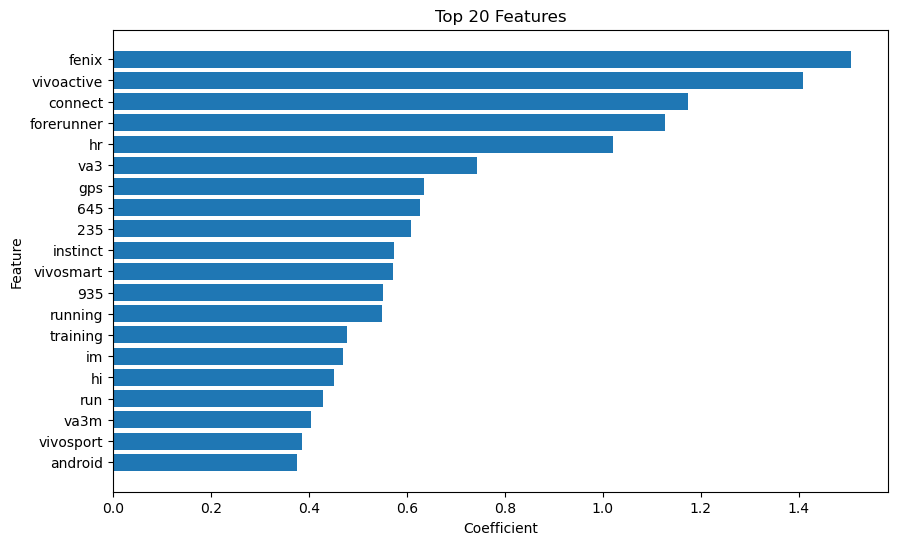

In [68]:
# Feature Analysis
# Get feature names
feature_names = cvec.get_feature_names_out()
# Get coefficients
coefficients = lr.coef_[0]
# Create a dataframe with a feature name and its coefficient
feature_importance = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
# Sort the dataframe by coefficient
feature_importance.sort_values(by='coefficient', ascending=False, inplace=True)
# Reset index
feature_importance.reset_index(drop=True, inplace=True)
# Plot the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'][:20], feature_importance['coefficient'][:20])
plt.title('Top 20 Features')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.savefig('top_20_features.png', bbox_inches='tight')
plt.show

In [81]:
# Check the best posts from Logsitic Regression with CVEC
X_test['y_pred_proba'] = lr.predict_proba(X_test_cvec)[:,1]
X_test.sort_values(by='y_pred_proba', ascending=False).head(10)

# Save the best posts to csv
best_posts = X_test.sort_values(by='y_pred_proba', ascending=False).to_csv('../data/best_posts.csv', index=False)

In [82]:
X_test

,title_text,y_pred,y_test,y_pred_proba
2272,Does Fenix 5S Plus Faces Remember Custom Pref...,garmin,garmin,0.830759
184,Vivoactive HR - Avg Calories Out over time? I'...,garmin,garmin,0.996866
2725,Since the 38mm es are shipping almost immediat...,applewatch,applewatch,0.035099
1361,FR235 not receiving text notifications on Andr...,garmin,garmin,0.949897
2856,Does the set off metal detectors (like those...,applewatch,applewatch,0.016124
...,...,...,...,...
601,how often you need to reset your I've been us...,garmin,garmin,0.988538
233,VivoActive HR Error So I have had my vivoacti...,garmin,garmin,0.990113
3410,What languages are supported by OS 2? Is adde...,applewatch,applewatch,0.456525
3512,Lessons learnt about making apps for I faced...,applewatch,applewatch,0.121687


## Conclusion
Based on the results above, the best model is `Logistic Regression` with CVEC.

Sample Sentences:
- Vivoactive HR - Avg Calories Out over time?
**Predict:** Garmin

- What languages are supported by WatchOS 2?
**Predict:** Apple Watch

Therefore, there are posts that users mentioned about Smart Watch brands in the right way.

To answer the problem statement, fenix serie, vivoactive, and Garmin connect app is right predicted, it got the highest score on coefficient that R&D team and digital marketing team will look through on the next step in csv file from data scientist team gave (Develop products and app)


## Recommendation
1. To be make more prediction, tokenize and lemmatize can increase significant scores(precision, recall, F1 and other scores).
2. Use Gaussian Naive Bayes, Voting, and other models to find other resuls, not only models that I created.

## Limitation
- The context or the meaning of a sentence or phrase can depend on behaviour of reddit users
- The data has to be collected from other competitors, for example, Suunto, Mi Watch, and other brands